In [32]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow import keras

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Flatten 

#from keras.models import Sequential
#from keras.layers import Dense, Flatten 

from sklearn import datasets

#from tensorflow import keras
#import keras

np.set_printoptions(suppress=True)
keras.__version__

'2.6.0'

# 1.Logistic Regression

#### X는 4x2행렬 형태, 차원이 2개 존재함을 의미 
#### 인풋 레이어부터 시작해서 히든레이어, 히든레이어…., 출력 레이어해서 순서대로 쌓아간다고 해서 sequential 레이어라 한다.

#### 일반적으로 사용하는 레이어가 dense 레이어
#### 인풋은 2개지만 출력은 하나이고 시그모이드 함수를 사용
#### 손실함수를 지정하고 adam으로 경사하강법을, 정확도로 성능측정을 하겠다.

In [8]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
#y = np.array([[0],[0],[0],[1]])
y = np.array([[0],[1],[1],[1]])

model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 182ms/step - loss: 0.6304 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6271 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6258 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.7500


#### 3000번 학습, verbose0을 주면 학습 과정이 보이지 않음

In [10]:
hist = model.fit(X, y, epochs=3000, verbose=0)

In [11]:
print(model.predict(X))

[[0.37460035]
 [0.8421658 ]
 [0.8533578 ]
 [0.98107463]]


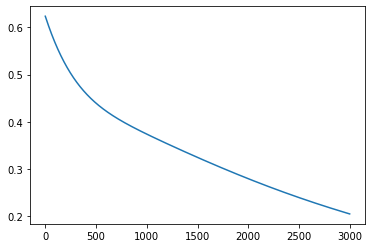

In [12]:
plt.plot(hist.history['loss'])

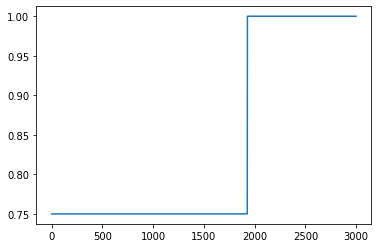

In [13]:
plt.plot(hist.history['accuracy'])

# 2.SoftMax Classification

In [14]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y_e = np.eye(3)[y]

#### 인풋이 4개가 각각 들어가는 출력이 3개 형태인 하나의 신경망이 된다 
#### 멀티클래스의 경우 categorical_cross…라는 손실함수 사용해야함

In [15]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X, y_e, epochs=4)

Epoch 1/4
5/5 [==============================] - 0s 1ms/step - loss: 3.3354 - accuracy: 0.3333
Epoch 2/4
5/5 [==============================] - 0s 1ms/step - loss: 3.2481 - accuracy: 0.3333
Epoch 3/4
5/5 [==============================] - 0s 951us/step - loss: 3.1659 - accuracy: 0.3333
Epoch 4/4
5/5 [==============================] - 0s 1ms/step - loss: 3.0814 - accuracy: 0.3333


In [17]:
hist = model.fit(X, y_e, epochs=2000, verbose=0)

#### 두 셀 모두 인식률을 계산하는 방법이지만 보통 evaluate를 사용

In [18]:
y_pred = model.predict_classes(X)
print(np.mean(y_pred==y))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [20]:
accuracy = model.evaluate(X, y_e)
print(accuracy)

5/5 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.9800
[0.11537019163370132, 0.9800000190734863]


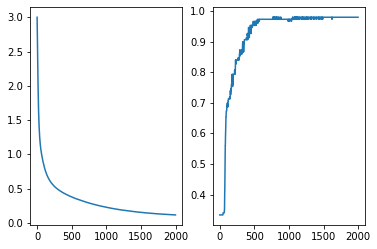

In [21]:
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])

# 3.XOR Classification

#### 이와같이 퍼셉트론으로는 xor문제를 풀 수 없음을 알 수 있다 인식률이 50%

In [22]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=7000, verbose=0)
print(model.predict(X))

[[0.49999997]
 [0.49999997]
 [0.50000006]
 [0.50000006]]


#### 입력데이터는 2개, 히든층의 유닛은 5개(렐루), 출력층의 유닛은 1개(시그모이드), 출력층은 꼭 시그모이드로 해야한다

In [23]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=2000, verbose=0)
print(model.predict(X))

[[0.16212738]
 [0.9323787 ]
 [0.8633288 ]
 [0.16237622]]


In [24]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=800, verbose=0)
print(model.predict(X))

[[0.096762  ]
 [0.92024225]
 [0.9009879 ]
 [0.09133026]]


In [25]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=800, verbose=0)
print(model.predict(X))

[[0.50000006]
 [0.50000006]
 [0.50000006]
 [0.50000006]]


In [26]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(5, activation=keras.layers.LeakyReLU()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X, y,  epochs=300, verbose=0)
print(model.predict(X))

[[0.2930803 ]
 [0.9976945 ]
 [0.92774856]
 [0.01250648]]


# 4.Fashion Image Recognition¶

#### 학습 데이터를 255로 나누어 정규화

In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_e = np.eye(10)[y_train]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Ankle boot')

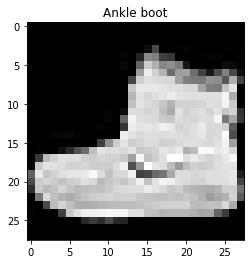

In [28]:
plt.imshow(x_train[0], cmap='gray')
plt.title(class_names[y_train[0]])

#### 2차원 데이터를 1차원으로 reshape, 28 x 28은 784이고 -1을 주면 전체데이터(60000개)를 의미

#### 히든층의 유닛은 128개, 출력층의 유닛은 10개(클래스가 10개라서)

In [29]:
x_train_1d = x_train.reshape(-1, 784)

model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(x_train_1d, y_train_e, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4967 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3731 - accuracy: 0.8660
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3356 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3122 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2957 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2815 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2688 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2577 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2491 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.242

#### 위에서는 2차원을 1차원으로 임의로 변경해 넣었는데 그렇게 하지말고 flattern을 이용해 내부적으로 2차원을 1차원으로 바꾸자

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_e, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5038 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3760 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3410 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3151 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2993 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2846 - accuracy: 0.8940
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2708 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2615 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2519 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.242

#### 앞에서는 one hot encoding으로 변경해주는 작업을 했었는데 로스함수에 sparse_를 앞에 붙여서 일반 레이블 표기법으로 학습 가능

In [34]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5035 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3813 - accuracy: 0.8617
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3389 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3169 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2968 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2687 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2577 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2481 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.241